In [1]:
##Import HW4 data
import pandas as pd
fire_data = pd.read_csv('forestfires.csv')
fire_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [2]:
import numpy as np
fire_data.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                         'aug', 'sep', 'oct', 'nov', 'dec'),
                        (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                        inplace=True)
fire_data.day.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'),
                      (1, 2, 3, 4, 5, 6, 7),
                      inplace=True)
fire_data['log_area'] = np.log10(fire_data['area']+1) # Plus 1 to avoid inf
fire_data


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.871573
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1.742647
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.084934
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


In [3]:
# Split the data
from sklearn.model_selection import train_test_split
X_data=fire_data.drop(['area','log_area'],axis=1).values
y_data=fire_data['log_area'].values
y_data = y_data.reshape(-1,1)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [8]:
# Fit MLP regression to the train data
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
regr = MLPRegressor(hidden_layer_sizes=(100,100,50), random_state=1, max_iter=500).fit(X_train, np.ravel(y_train))
y_predmlp=regr.predict(X_test)
regr.score(X_test, y_test)

-0.2065190773738832

In [5]:
# REC curve
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

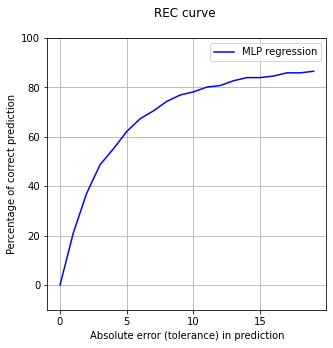

In [6]:
#Plot REC curve of the MLPRegressor model
import matplotlib.pyplot as plt
tol_max = 20
rec_mlp=[]

for i in range(tol_max):
    rec_mlp.append(rec(y_predmlp,y_test,i))
plt.figure(figsize=(5,5))
plt.title("REC curve \n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_mlp,'b',label='MLP regression')
plt.legend()
plt.show()